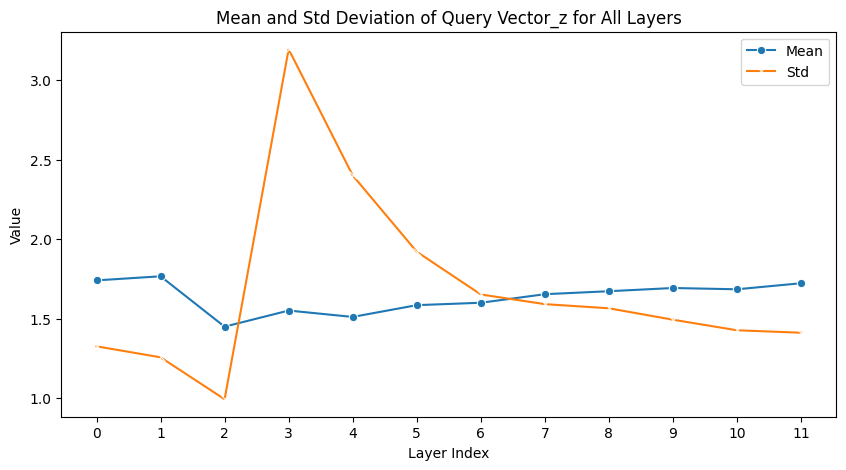

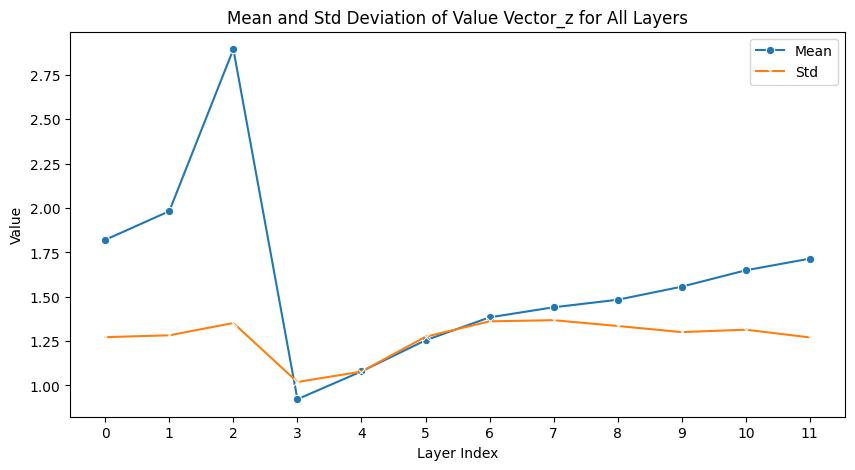

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 定义文件路径
vector_z_data_dir = "/root/shiym_proj/Sara/vit-finetune/vectors/vector_z_flowers_full"
output_dir = "/root/shiym_proj/Sara/vit-finetune/trained_plot_flowers_full"
# vector_z_data_dir = "/root/shiym_proj/Sara/vit-finetune/vector_z_aircraft_real"
# output_dir = "/root/shiym_proj/Sara/vit-finetune/trained_plot_aircraft_real"
os.makedirs(output_dir, exist_ok=True)

# 初始化存储均值和标准差的列表
all_layers_mean_query = []
all_layers_std_query = []
all_layers_mean_value = []
all_layers_std_value = []

# 加载所有的 `vector_z` 数据
all_layers_vector_z_query = []
all_layers_vector_z_value = []

for file_name in sorted(os.listdir(vector_z_data_dir)):
    if file_name.endswith("_query.pt"):
        vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
        all_layers_vector_z_query.append(vector_z)
    elif file_name.endswith("_value.pt"):
        vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
        all_layers_vector_z_value.append(vector_z)

# 分析并绘制每个层的 `vector_z` 数据
def analyze_and_plot(vector_z_list, prefix):
    all_layers_mean = []
    all_layers_std = []

    for idx, vector_z in enumerate(vector_z_list):
        # 计算均值和标准差
        mean_value = vector_z.mean().item()
        std_value = vector_z.std().item()
        all_layers_mean.append(mean_value)
        all_layers_std.append(std_value)

        # 创建绘图
        plt.figure(figsize=(10, 5))

        # 使用 Seaborn 绘制直方图
        sns.histplot(vector_z.detach().cpu().numpy(), bins=50, kde=True, color='skyblue')

        # 添加标题和标签
        plt.title(f'Distribution of {prefix.capitalize()} Vector_z for Layer {idx + 1}')
        plt.xlabel('Parameter Value')
        plt.ylabel('Frequency')

        # 添加均值和标准差的线
        plt.axvline(x=mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')
        plt.axvline(x=mean_value - std_value, color='green', linestyle='--', linewidth=1, label=f'Mean - Std: {mean_value - std_value:.2f}')
        plt.axvline(x=mean_value + std_value, color='green', linestyle='--', linewidth=1, label=f'Mean + Std: {mean_value + std_value:.2f}')

        # 添加图例
        plt.legend()

        # 保存图像
        plot_path = os.path.join(output_dir, f'layer_{idx + 1}_{prefix}_distribution.png')
        plt.savefig(plot_path)

        # 关闭当前图形以释放内存
        plt.close()

    return all_layers_mean, all_layers_std

# 分析并绘制 `query` 和 `value` 的 `vector_z`
all_layers_mean_query, all_layers_std_query = analyze_and_plot(all_layers_vector_z_query, "query")
all_layers_mean_value, all_layers_std_value = analyze_and_plot(all_layers_vector_z_value, "value")

# 绘制均值和标准差的折线图
def plot_mean_std(all_layers_mean, all_layers_std, prefix):
    plt.figure(figsize=(10, 5))

    # 使用 Seaborn 绘制折线图
    sns.lineplot(x=range(len(all_layers_mean)), y=all_layers_mean, marker='o', label='Mean')
    sns.lineplot(x=range(len(all_layers_std)), y=all_layers_std, marker='x', label='Std')

    # 添加标题和标签
    plt.title(f'Mean and Std Deviation of {prefix.capitalize()} Vector_z for All Layers')
    plt.xlabel('Layer Index')
    plt.ylabel('Value')
    plt.xticks(range(len(all_layers_mean)))

    # 添加图例
    plt.legend()

    # 保存图像
    summary_plot_path = os.path.join(output_dir, f'all_layers_{prefix}_mean_std.png')
    plt.savefig(summary_plot_path)

    # 显示图形
    plt.show()

# 绘制 `query` 和 `value` 的均值和标准差图
plot_mean_std(all_layers_mean_query, all_layers_std_query, "query")
plot_mean_std(all_layers_mean_value, all_layers_std_value, "value")


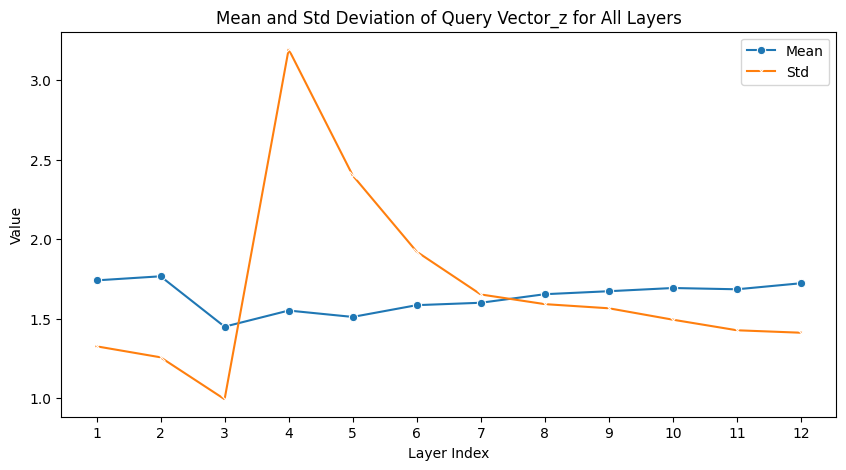

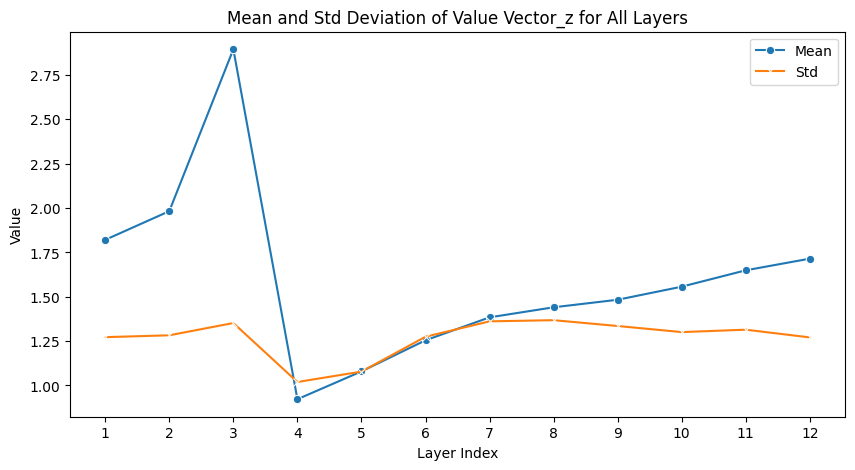

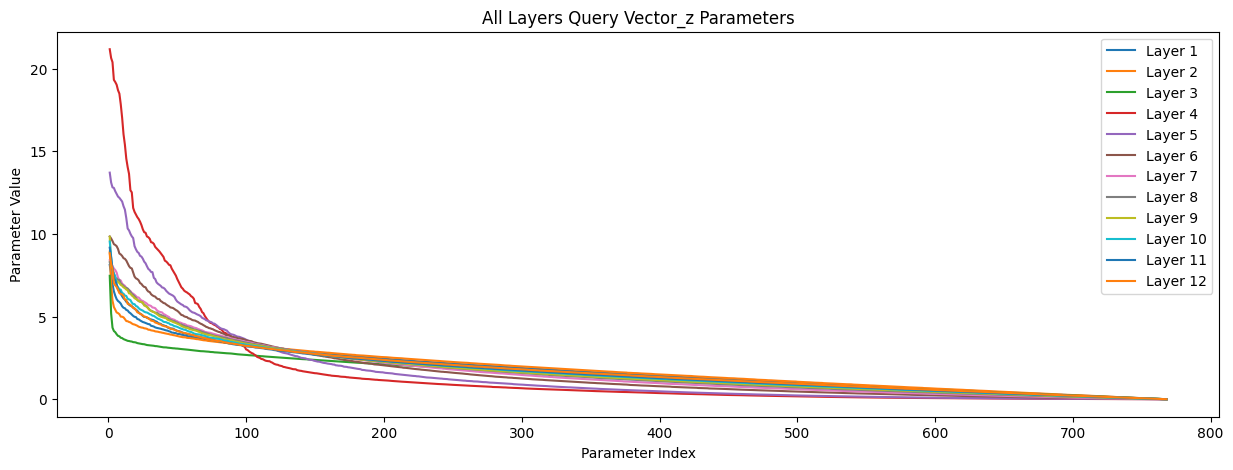

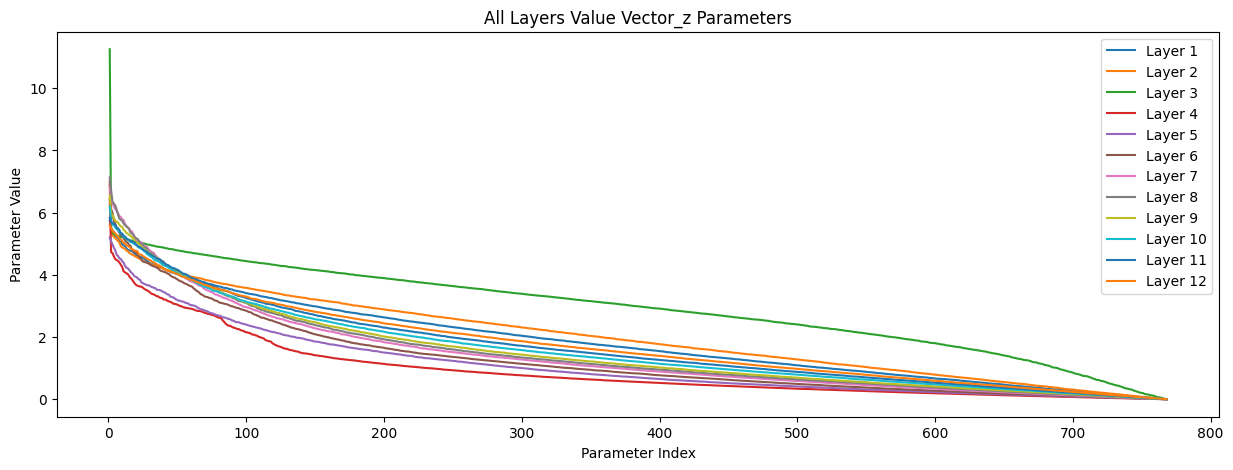

In [2]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 定义文件路径
# vector_z_data_dir = "/root/shiym_proj/Sara/vit-finetune/vector_z_flowers_real"
# output_dir = "/root/shiym_proj/Sara/vit-finetune/trained_plot_flowers_real"
# vector_z_data_dir = "/root/shiym_proj/Sara/vit-finetune/vector_z_aircraft_real"
# output_dir = "/root/shiym_proj/Sara/vit-finetune/trained_plot_aircraft_real"

# os.makedirs(output_dir, exist_ok=True)

# 初始化存储均值和标准差的列表
all_layers_mean_query = []
all_layers_std_query = []
all_layers_mean_value = []
all_layers_std_value = []

# 加载所有的 `vector_z` 数据
all_layers_vector_z_query = []
all_layers_vector_z_value = []

for file_name in sorted(os.listdir(vector_z_data_dir)):
    if file_name.endswith("_query.pt"):
        vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
        all_layers_vector_z_query.append(vector_z)
    elif file_name.endswith("_value.pt"):
        vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
        all_layers_vector_z_value.append(vector_z)

# 分析并绘制每个层的 `vector_z` 数据
def analyze_and_plot(vector_z_list, prefix):
    all_layers_mean = []
    all_layers_std = []

    for idx, vector_z in enumerate(vector_z_list):
        # 计算均值和标准差
        mean_value = vector_z.mean().item()
        std_value = vector_z.std().item()
        all_layers_mean.append(mean_value)
        all_layers_std.append(std_value)

        # 创建绘图
        plt.figure(figsize=(10, 5))

        # 使用 Seaborn 绘制折线图
        sns.lineplot(x=range(1, len(vector_z) + 1), y=vector_z.detach().cpu().numpy(), marker='o')

        # 添加标题和标签
        plt.title(f'{prefix.capitalize()} Vector_z Parameters for Layer {idx + 1}')
        plt.xlabel('Parameter Index')
        plt.ylabel('Parameter Value')

        # 保存图像
        plot_path = os.path.join(output_dir, f'layer_{idx + 1}_{prefix}_parameters.png')
        plt.savefig(plot_path)

        # 关闭当前图形以释放内存
        plt.close()

    return all_layers_mean, all_layers_std

# 分析并绘制 `query` 和 `value` 的 `vector_z`
all_layers_mean_query, all_layers_std_query = analyze_and_plot(all_layers_vector_z_query, "query")
all_layers_mean_value, all_layers_std_value = analyze_and_plot(all_layers_vector_z_value, "value")

# 绘制均值和标准差的折线图
def plot_mean_std(all_layers_mean, all_layers_std, prefix):
    plt.figure(figsize=(10, 5))

    # 使用 Seaborn 绘制折线图
    sns.lineplot(x=range(1, len(all_layers_mean) + 1), y=all_layers_mean, marker='o', label='Mean')
    sns.lineplot(x=range(1, len(all_layers_std) + 1), y=all_layers_std, marker='x', label='Std')

    # 添加标题和标签
    plt.title(f'Mean and Std Deviation of {prefix.capitalize()} Vector_z for All Layers')
    plt.xlabel('Layer Index')
    plt.ylabel('Value')
    plt.xticks(range(1, len(all_layers_mean) + 1))

    # 添加图例
    plt.legend()

    # 保存图像
    summary_plot_path = os.path.join(output_dir, f'all_layers_{prefix}_mean_std.png')
    plt.savefig(summary_plot_path)

    # 显示图形
    plt.show()

# 绘制 `query` 和 `value` 的均值和标准差图
plot_mean_std(all_layers_mean_query, all_layers_std_query, "query")
plot_mean_std(all_layers_mean_value, all_layers_std_value, "value")

# 绘制所有层的参数总图
def plot_all_layers_combined(vector_z_list, prefix):
    plt.figure(figsize=(15, 5))

    for idx, vector_z in enumerate(vector_z_list):
        sns.lineplot(x=range(1, len(vector_z) + 1), y=vector_z.detach().cpu().numpy(), label=f'Layer {idx + 1}')

    # 添加标题和标签
    plt.title(f'All Layers {prefix.capitalize()} Vector_z Parameters')
    plt.xlabel('Parameter Index')
    plt.ylabel('Parameter Value')

    # 添加图例
    plt.legend()

    # 保存图像
    plot_path = os.path.join(output_dir, f'all_layers_{prefix}_parameters_combined.png')
    plt.savefig(plot_path)

    # 显示图形
    plt.show()

# 绘制所有层的 `query` 和 `value` 参数总图
plot_all_layers_combined(all_layers_vector_z_query, "query")
plot_all_layers_combined(all_layers_vector_z_value, "value")


In [3]:
# import torch
# import os
# import matplotlib.pyplot as plt

# # 定义文件路径
# vector_z_data_dir = "/root/shiym_proj/Sara/vit-finetune/vector_z_aircraft"
# output_dir = "/root/shiym_proj/Sara/vit-finetune/trained_plot_aircraft"
# os.makedirs(output_dir, exist_ok=True)

# # 初始化存储均值和标准差的列表
# all_layers_mean_query = []
# all_layers_std_query = []
# all_layers_mean_value = []
# all_layers_std_value = []

# # 加载所有的 `vector_z` 数据
# all_layers_vector_z_query = []
# all_layers_vector_z_value = []

# for file_name in sorted(os.listdir(vector_z_data_dir)):
#     if file_name.endswith("_query.pt"):
#         vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
#         all_layers_vector_z_query.append(vector_z)
#     elif file_name.endswith("_value.pt"):
#         vector_z = torch.load(os.path.join(vector_z_data_dir, file_name))
#         all_layers_vector_z_value.append(vector_z)

# # 分析并绘制每个层的 `vector_z` 数据
# def analyze_and_plot(vector_z_list, prefix):
#     all_layers_mean = []
#     all_layers_std = []

#     for idx, vector_z in enumerate(vector_z_list):
#         # 计算均值和标准差
#         mean_value = vector_z.mean().item()
#         std_value = vector_z.std().item()
#         all_layers_mean.append(mean_value)
#         all_layers_std.append(std_value)

#         # 创建绘图
#         plt.figure(figsize=(10, 5))

#         # 绘制直方图
#         plt.hist(vector_z.detach().cpu().numpy(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)

#         # 添加标题和标签
#         plt.title(f'Distribution of {prefix.capitalize()} Vector_z for Layer {idx + 1}')
#         plt.xlabel('Parameter Value')
#         plt.ylabel('Frequency')

#         # 添加均值和标准差的线
#         plt.axvline(x=mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')
#         plt.axvline(x=mean_value - std_value, color='green', linestyle='--', linewidth=1, label=f'Mean - Std: {mean_value - std_value:.2f}')
#         plt.axvline(x=mean_value + std_value, color='green', linestyle='--', linewidth=1, label=f'Mean + Std: {mean_value + std_value:.2f}')

#         # 添加图例
#         plt.legend()

#         # 保存图像
#         plot_path = os.path.join(output_dir, f'layer_{idx + 1}_{prefix}_distribution.png')
#         plt.savefig(plot_path)

#         # 关闭当前图形以释放内存
#         plt.close()

#     return all_layers_mean, all_layers_std

# # 分析并绘制 `query` 和 `value` 的 `vector_z`
# all_layers_mean_query, all_layers_std_query = analyze_and_plot(all_layers_vector_z_query, "query")
# all_layers_mean_value, all_layers_std_value = analyze_and_plot(all_layers_vector_z_value, "value")

# # 绘制均值和标准差的折线图
# def plot_mean_std(all_layers_mean, all_layers_std, prefix):
#     plt.figure(figsize=(10, 5))

#     # 绘制均值和标准差的折线图
#     plt.plot(all_layers_mean, label='Mean', marker='o')
#     plt.plot(all_layers_std, label='Std', marker='x')

#     # 添加标题和标签
#     plt.title(f'Mean and Std Deviation of {prefix.capitalize()} Vector_z for All Layers')
#     plt.xlabel('Layer Index')
#     plt.ylabel('Value')
#     plt.xticks(range(len(all_layers_mean)))

#     # 添加图例
#     plt.legend()

#     # 保存图像
#     summary_plot_path = os.path.join(output_dir, f'all_layers_{prefix}_mean_std.png')
#     plt.savefig(summary_plot_path)

#     # 显示图形
#     plt.show()

# # 绘制 `query` 和 `value` 的均值和标准差图
# plot_mean_std(all_layers_mean_query, all_layers_std_query, "query")
# plot_mean_std(all_layers_mean_value, all_layers_std_value, "value")
